# tuning analyses

In [ ]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd
import warnings
from cascade import utils

In [154]:
# set parameters for running GLM
mice = cas.lookups.mice['all12']
# words = ['facilitate'] * len(mice)
words = ['bookmarks' if s in 'OA27' else 'horrible' for s in mice]
group_by = 'all3'

# load in a full size tensor
model_list = []
tensor_list = []
id_list = []
bhv_list = []
meta_list = []
for mouse, word in zip(mice, words):
    
    # return   model, ids, tensor, meta, bhv
    out = cas.load.load_all_groupday(mouse, word=word, with_model=True, group_by=group_by, nan_thresh=0.95)
    model_list.append(out[0])
    tensor_list.append(out[2])
    id_list.append(out[1])
    bhv_list.append(out[4])
    meta_list.append(out[3])

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

In [212]:
staging_list = []
for meta, model in zip(meta_list, model_list):
    df = cas.tuning.component_tuning(meta, model, 15, by_stage=True, staging='parsed_11stage', tuning_type='cond')
    staging_list.append(df)

test = pd.concat(staging_list, axis=0)

In [ ]:
frac_df.groupby(['parsed_11stage', 'preferred tuning']).count()

In [309]:
frac_df

fraction tuned components
mouse parsed_11stage preferred tuning                           
AS20  L1 learning    broad                              0.333333
                     plus-neutral                       0.066667
      L1 reversal1   broad                              0.200000
                     minus-plus                         0.133333
                     neutral-plus                       0.066667
      L2 learning    broad                              0.133333
                     minus-neutral                      0.066667
                     plus                               0.066667
                     plus-minus                         0.066667
                     plus-neutral                       0.066667
      L2 reversal1   broad                              0.133333
                     minus-neutral                      0.133333
                     neutral                            0.066667
                     plus-neutral                       0.066667
      L3 learning    minus-neutral                      0.133333
                     neutral-minus                      0.133333
                     plus                               0.066667
                     plus-neutral                       0.066667
      L3 reversal1   broad                              0.066667
                     minus                              0.066667
                     minus-neutral                      0.133333
                     neutral-plus                       0.066667
                     plus                               0.066667
      L4 learning    minus                              0.066667
                     minus-neutral                      0.133333
                     neutral-minus                      0.066667
                     plus                               0.133333
      L4 reversal1   broad                              0.133333
                     minus-neutral                      0.066667
                     neutral-minus                      0.133333
...                                                          ...
OA67  L5 reversal1   broad                              0.066667
                     minus-neutral                      0.066667
                     plus                               0.133333
VF226 L0 naive       broad                              0.200000
                     plus                               0.066667
                     plus-neutral                       0.066667
      L1 learning    broad                              0.200000
                     plus                               0.066667
                     plus-minus                         0.066667
      L1 reversal1   broad                              0.133333
                     neutral-plus                       0.200000
      L2 learning    broad                              0.200000
                     plus                               0.133333
      L2 reversal1   broad                              0.133333
                     neutral                            0.133333
                     plus-neutral                       0.066667
      L3 learning    broad                              0.200000
                     plus                               0.133333
      L3 reversal1   broad                              0.200000
                     neutral                            0.066667
                     neutral-plus                       0.066667
      L4 learning    broad                              0.200000
                     plus                               0.133333
      L4 reversal1   broad                              0.266667
                     neutral-minus                      0.066667
      L5 learning    broad                              0.200000
                     plus                               0.066667
                     plus-neutral                       0.066667
      L5 reversal1   broad                              0.266667
         

In [339]:
for g in test.loc[test['offset component'], :].groupby(['mouse', 'parsed_11stage', 'preferred tuning']):
    print(g)
    break

(('AS20', 'L1 learning', 'broad'),                 parsed_11stage preferred tuning  \
mouse component                                   
AS20  1            L1 learning            broad   
      7            L1 learning            broad   
      11           L1 learning            broad   
      12           L1 learning            broad   
      13           L1 learning            broad   

                                                     cosine tuning  \
mouse component                                                      
AS20  1          [0.2441643183115123, 0.5124856460348719, 0.562...   
      7          [0.45064672404486616, 0.5357822306950546, 0.30...   
      11         [0.5195216459973755, 0.342457563547065, 0.4196...   
      12         [0.4453866183642775, 0.29385240067758556, 0.55...   
      13         [0.311925081331906, 0.5502183922581683, 0.4305...   

                 offset component  
mouse component                    
AS20  1                      True  
      7 

In [342]:
g[1]

parsed_11stage preferred tuning  \
mouse component                                   
AS20  1            L1 learning            broad   
      7            L1 learning            broad   
      11           L1 learning            broad   
      12           L1 learning            broad   
      13           L1 learning            broad   

                                                     cosine tuning  \
mouse component                                                      
AS20  1          [0.2441643183115123, 0.5124856460348719, 0.562...   
      7          [0.45064672404486616, 0.5357822306950546, 0.30...   
      11         [0.5195216459973755, 0.342457563547065, 0.4196...   
      12         [0.4453866183642775, 0.29385240067758556, 0.55...   
      13         [0.311925081331906, 0.5502183922581683, 0.4305...   

                 offset component  
mouse component                    
AS20  1                      True  
      7                      True  
      11                     True  
      12                     True  
      13                     True

Text(0.5, 1.0, 'All components')

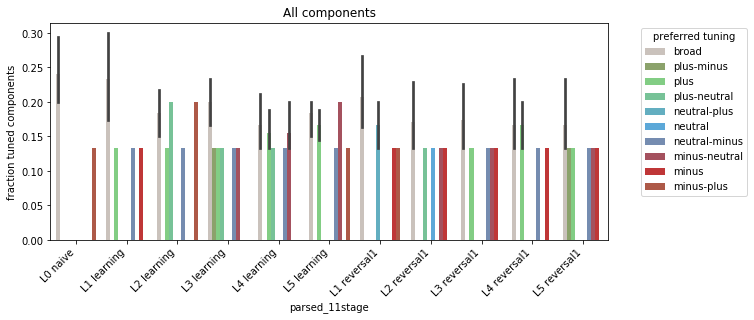

In [323]:
frac_df = test.loc[test['offset component'], :].groupby(['mouse', 'parsed_11stage', 'preferred tuning']).count()['cosine tuning']/15
frac_df = frac_df.to_frame('fraction tuned components')
frac_df = frac_df.loc[frac_df['fraction tuned components'].gt(1/15)]
# frac_df.rename(columns={'cosine tuning': 'preferred tuning'}, inplace=True)

# hue_order=['broad', '0', '135', '270']

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.barplot(data=frac_df.reset_index(), x='parsed_11stage', order=xorder, y='fraction tuned components',
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('All components')

In [343]:
for gr in test.loc[test['offset component'], :].groupby('parsed_11stage'):
    plt.figure()
    if gr[0] == 'L5 learning':
#     if 'learning' in gr[0]:
        g = sns.clustermap(np.vstack(gr[1]['cosine tuning'].values).T, row_cluster=False)
        new_inds = g.dendrogram_col.reordered_ind
    plt.close(g.fig)
    
    plt.figure(figsize=(15, 3))
    sns.heatmap(np.vstack(gr[1]['cosine tuning'].values).T[:, new_inds], cmap='YlGnBu')
    plt.title(gr[0])

AttributeError: 'tuple' object has no attribute 'fig'

<Figure size 432x288 with 0 Axes>

In [ ]:
test.loc[~test['offset component'], :].groupby(['mouse', 'parsed_11stage', 'preferred tuning']).count()

In [162]:
test['parsed_11stage'].unique()
xorder = ['L0 naive',
          'L1 learning', 'L2 learning', 'L3 learning', 'L4 learning', 'L5 learning',
          'L1 reversal1', 'L2 reversal1', 'L3 reversal1', 'L4 reversal1', 'L5 reversal1']

Text(0.5, 1.0, 'Only offset components')

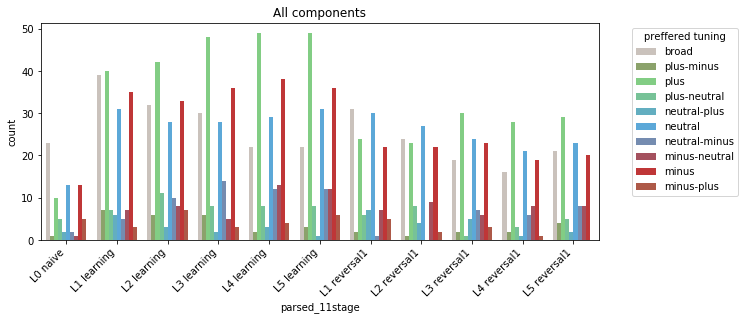

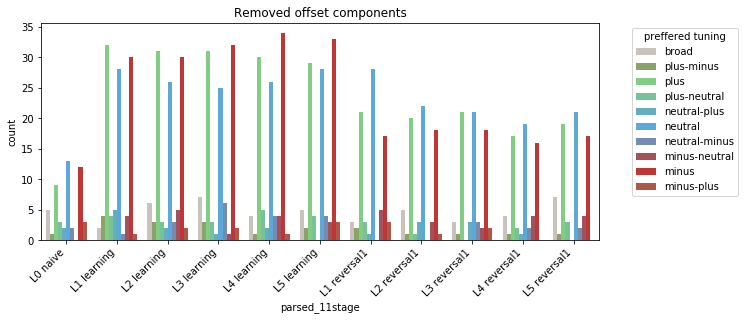

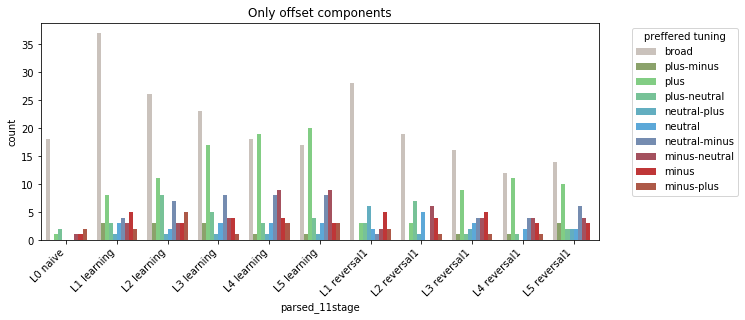

In [214]:
plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.countplot(data=test, x='parsed_11stage', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('All components')

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.countplot(data=test.loc[~test['offset component'], :], x='parsed_11stage', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('Removed offset components')

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.countplot(data=test.loc[test['offset component'], :], x='parsed_11stage', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('Only offset components')

In [380]:
test.head()

parsed_11stage preferred tuning  \
mouse component                                   
AS20  1            L1 learning            broad   
      1           L1 reversal1       minus-plus   
      1            L2 learning       plus-minus   
      1           L2 reversal1            broad   
      1            L3 learning    minus-neutral   

                                                     cosine tuning  \
mouse component                                                      
AS20  1          [0.2441643183115123, 0.5124856460348719, 0.562...   
      1          [0.1863110316610722, 0.6225021642037432, 0.557...   
      1          [0.44777773216373407, 0.6354353614064087, 0.25...   
      1          [0.4396235629301112, 0.33989958953017785, 0.49...   
      1          [0.10981803750599561, 0.5872224339066098, 0.80...   

                 offset component  
mouse component                    
AS20  1                      True  
      1                      True  
      1                      True  
      1                      True  
      1                      True

## fraction of components

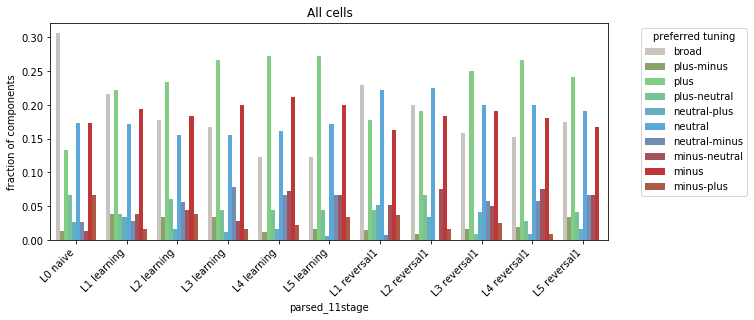

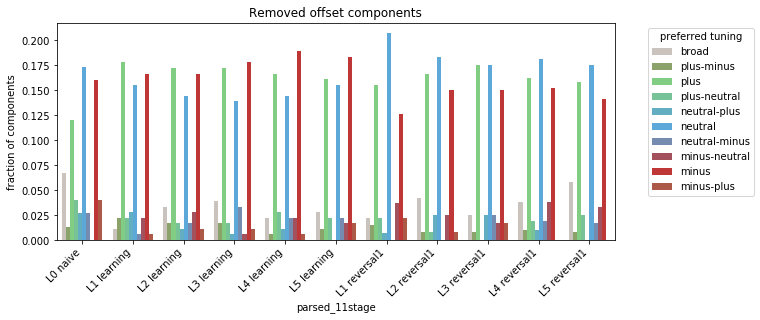

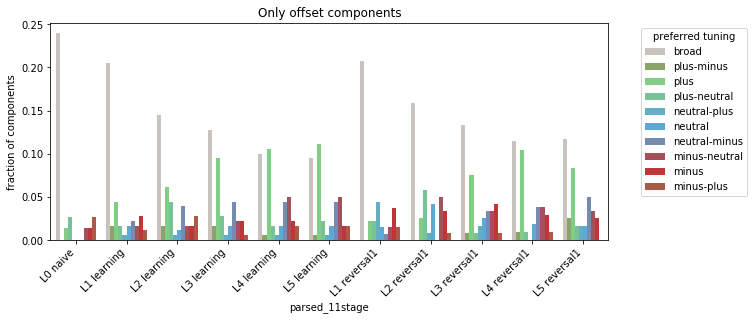

In [383]:
# fraction of components

# all comps
bin_counts = test.groupby(['parsed_11stage', 'preferred tuning']).count()
bin_denoms = test.reset_index().drop(columns=['cosine tuning']).groupby(['parsed_11stage']).nunique()
making_div_easy = bin_counts.merge(bin_denoms.mouse, how='left', left_index=True, right_index=True)
frac = (making_div_easy['cosine tuning']/making_div_easy.mouse/15).rename('fraction of components')
frac.head()

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.barplot(data=frac.reset_index(), y='fraction of components', x='parsed_11stage', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('All cells')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/comp_tuning_all.png', bbox_inches='tight')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/comp_tuning_all.pdf', bbox_inches='tight')

# not offset
bin_counts = test.loc[~test['offset component']].groupby(['parsed_11stage', 'preferred tuning']).count()
bin_denoms = test.reset_index().drop(columns=['cosine tuning']).groupby(['parsed_11stage']).nunique()
making_div_easy = bin_counts.merge(bin_denoms.mouse, how='left', left_index=True, right_index=True)
frac = (making_div_easy['cosine tuning']/making_div_easy.mouse/15).rename('fraction of components')
frac.head()

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.barplot(data=frac.reset_index(), y='fraction of components', x='parsed_11stage', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('Removed offset components')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/comp_tuning_nooffset.png', bbox_inches='tight')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/comp_tuning_nooffset.pdf', bbox_inches='tight')

# offset
bin_counts = test.loc[test['offset component']].groupby(['parsed_11stage', 'preferred tuning']).count()
bin_denoms = test.reset_index().drop(columns=['cosine tuning']).groupby(['parsed_11stage']).nunique()
making_div_easy = bin_counts.merge(bin_denoms.mouse, how='left', left_index=True, right_index=True)
frac = (making_div_easy['cosine tuning']/making_div_easy.mouse/15).rename('fraction of components')
frac.head()

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.barplot(data=frac.reset_index(), y='fraction of components', x='parsed_11stage', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('Only offset components')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/comp_tuning_offset.png', bbox_inches='tight')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/comp_tuning_offset.pdf', bbox_inches='tight')

## by cell

In [232]:
staging_list = []
for meta, tensor, model in zip(meta_list, tensor_list, model_list):
    df = cas.tuning.cell_tuning(meta, tensor, model, 15, by_stage=True, staging='parsed_11stage', tuning_type='cond')
    staging_list.append(df)

cell_tuning = pd.concat(staging_list, axis=0)

s:\twophoton_analysis\code\cascade\cascade\tuning.py:69: RuntimeWarning: Mean of empty slice
  trial_avg_vec = np.nanmean(cell_mat, axis=0)
s:\twophoton_analysis\code\cascade\cascade\tuning.py:278: RuntimeWarning: Mean of empty slice
  mean_cue.append(np.nanmean(rect_trial_avg_vec[cue_boo]))


In [234]:
cell_tuning.head()

parsed_11stage preferred tuning  \
mouse cell_n                                   
AS20  1         L1 learning    minus-neutral   
      1        L1 reversal1            broad   
      1         L2 learning            broad   
      1        L2 reversal1            broad   
      1         L3 learning            broad   

                                                  cosine tuning  \
mouse cell_n                                                      
AS20  1       [0.27703752393513315, 0.40878113394493887, 0.6...   
      1       [0.4383533511466914, 0.5231192469343395, 0.323...   
      1       [0.4590143105844128, 0.46017341813116475, 0.35...   
      1       [0.3401368836046009, 0.5120632747216645, 0.428...   
      1       [0.24308305431762656, 0.5690768222639064, 0.50...   

              best component  offset component  offset cell  
mouse cell_n                                                 
AS20  1                  NaN               NaN        False  
      1                  NaN               NaN        False  
      1                  NaN               NaN        False  
      1                  NaN               NaN        False  
      1                  NaN               NaN        False

## remove cells that did not have a best component

In [238]:
cell_tuning_best = cell_tuning.dropna()
print(cell_tuning_best.shape)
cell_tuning_best.head()

(32978, 6)


parsed_11stage preferred tuning  \
mouse cell_n                                   
AS20  4         L1 learning       minus-plus   
      4        L1 reversal1            broad   
      4         L2 learning            broad   
      4        L2 reversal1     neutral-plus   
      4         L3 learning            minus   

                                                  cosine tuning  \
mouse cell_n                                                      
AS20  4       [0.15808048558913823, 0.79117220674536, 0.5024...   
      4       [0.32255640341508496, 0.4243627171918556, 0.54...   
      4       [0.5720660939569442, 0.5131672455142355, 0.238...   
      4       [0.7090696539178545, 0.2583123763475277, 0.395...   
      4       [0.10398950324562051, 0.7360552579190708, 0.64...   

              best component  offset component  offset cell  
mouse cell_n                                                 
AS20  4                  1.0               1.0         True  
      4                  1.0               1.0         True  
      4                  1.0               1.0         True  
      4                  1.0               1.0         True  
      4                  1.0               1.0         True

## plot tuning changes across cells

Text(0.5, 1.0, 'Only offset cells')

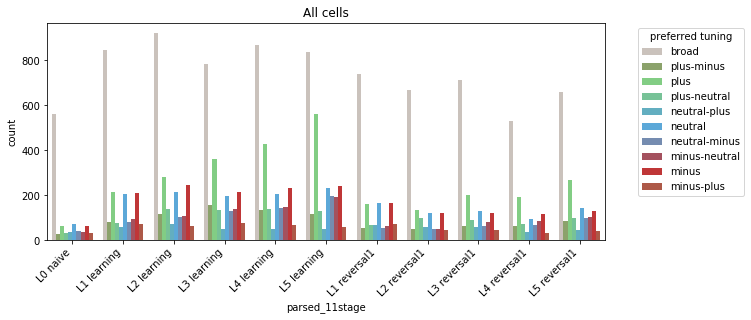

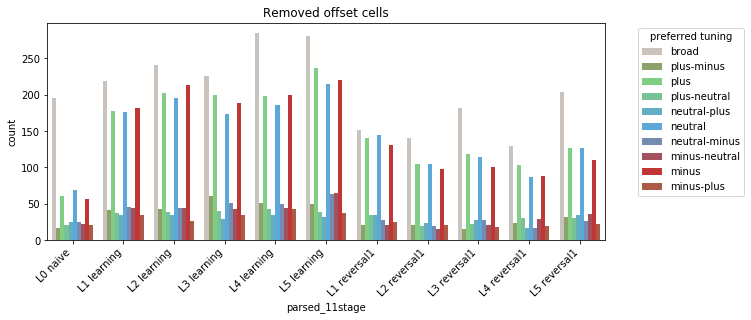

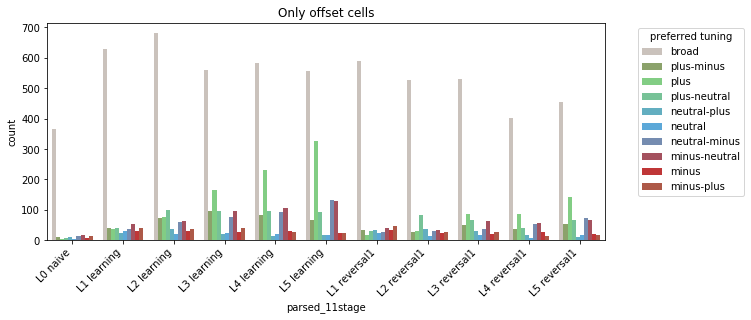

In [252]:
plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.countplot(data=cell_tuning_best, x='parsed_11stage', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('All cells')

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.countplot(data=cell_tuning_best.loc[~cell_tuning_best['offset cell'], :], x='parsed_11stage', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('Removed offset cells')

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.countplot(data=cell_tuning_best.loc[cell_tuning_best['offset cell'], :], x='parsed_11stage', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning')
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('Only offset cells')

# faction of cells per mouse with particular type of tuning

In [254]:
# groupby here
cell_tuning_best = cell_tuning.dropna()
cell_tuning_best.head()

parsed_11stage preferred tuning  \
mouse cell_n                                   
AS20  4         L1 learning       minus-plus   
      4        L1 reversal1            broad   
      4         L2 learning            broad   
      4        L2 reversal1     neutral-plus   
      4         L3 learning            minus   

                                                  cosine tuning  \
mouse cell_n                                                      
AS20  4       [0.15808048558913823, 0.79117220674536, 0.5024...   
      4       [0.32255640341508496, 0.4243627171918556, 0.54...   
      4       [0.5720660939569442, 0.5131672455142355, 0.238...   
      4       [0.7090696539178545, 0.2583123763475277, 0.395...   
      4       [0.10398950324562051, 0.7360552579190708, 0.64...   

              best component  offset component  offset cell  
mouse cell_n                                                 
AS20  4                  1.0               1.0         True  
      4                  1.0               1.0         True  
      4                  1.0               1.0         True  
      4                  1.0               1.0         True  
      4                  1.0               1.0         True

In [332]:
cell_tuning_best.reset_index().groupby(['mouse', 'parsed_11stage', 'best component']).apply(lambda x:  axis=0)

KeyError: 'Column not found: 0'

In [300]:
# get denominator, total good cells (had a best component) per mouse
cell_tuning_best = cell_tuning.dropna()
cells_per_mouse = cell_tuning_best \
                    .reset_index() \
                    .loc[:, ['mouse', 'parsed_11stage', 'cell_n']] \
                    .groupby(['mouse', 'parsed_11stage']) \
                    .nunique() \
                    .drop(columns=['mouse', 'parsed_11stage'])
cells_per_mouse_per_tuning_type = cell_tuning_best \
                                    .groupby(['mouse', 'parsed_11stage', 'preferred tuning']) \
                                    .count()
cells_per_mouse_per_tuning_type = pd.DataFrame(data={'cell_count': cells_per_mouse_per_tuning_type['cosine tuning']}, 
                                              index=cells_per_mouse_per_tuning_type.index)
fraction_of_cells = cells_per_mouse_per_tuning_type.merge(cells_per_mouse, how='left', left_index=True, right_index=True)
cell_fractions = fraction_of_cells.cell_count / fraction_of_cells.cell_n
cell_fractions.name = 'fraction of cells'
print(cell_fractions.head())

# now for with offset cells
cell_tuning_best = cell_tuning.dropna()
offset_tuning_best = cell_tuning_best.loc[cell_tuning_best['offset cell'], :]
cells_per_mouse = offset_tuning_best \
                    .reset_index() \
                    .loc[:, ['mouse', 'parsed_11stage', 'cell_n']] \
                    .groupby(['mouse', 'parsed_11stage']) \
                    .nunique() \
                    .drop(columns=['mouse', 'parsed_11stage'])
cells_per_mouse_per_tuning_type = offset_tuning_best \
                                    .groupby(['mouse', 'parsed_11stage', 'preferred tuning']) \
                                    .count()
cells_per_mouse_per_tuning_type = pd.DataFrame(data={'cell_count': cells_per_mouse_per_tuning_type['cosine tuning']}, 
                                              index=cells_per_mouse_per_tuning_type.index)
fraction_of_cells = cells_per_mouse_per_tuning_type.merge(cells_per_mouse, how='left', left_index=True, right_index=True)
offset_cell_fractions = fraction_of_cells.cell_count / fraction_of_cells.cell_n
offset_cell_fractions.name = 'fraction of cells'
print(offset_cell_fractions.head())

# now for without offset cells
cell_tuning_best = cell_tuning.dropna()
not_offset_tuning_best = cell_tuning_best.loc[~cell_tuning_best['offset cell'], :]
cells_per_mouse = not_offset_tuning_best \
                    .reset_index() \
                    .loc[:, ['mouse', 'parsed_11stage', 'cell_n']] \
                    .groupby(['mouse', 'parsed_11stage']) \
                    .nunique() \
                    .drop(columns=['mouse', 'parsed_11stage'])
cells_per_mouse_per_tuning_type = not_offset_tuning_best \
                                    .groupby(['mouse', 'parsed_11stage', 'preferred tuning']) \
                                    .count()
cells_per_mouse_per_tuning_type = pd.DataFrame(data={'cell_count': cells_per_mouse_per_tuning_type['cosine tuning']}, 
                                              index=cells_per_mouse_per_tuning_type.index)
fraction_of_cells = cells_per_mouse_per_tuning_type.merge(cells_per_mouse, how='left', left_index=True, right_index=True)
not_offset_cell_fractions = fraction_of_cells.cell_count / fraction_of_cells.cell_n
not_offset_cell_fractions.name = 'fraction of cells'
print(not_offset_cell_fractions.head())

mouse  parsed_11stage  preferred tuning
AS20   L1 learning     broad               0.141631
                       minus               0.060086
                       minus-neutral       0.012876
                       minus-plus          0.021459
                       neutral             0.081545
Name: fraction of cells, dtype: float64
mouse  parsed_11stage  preferred tuning
AS20   L1 learning     broad               0.260870
                       minus               0.017391
                       minus-neutral       0.026087
                       minus-plus          0.026087
                       neutral             0.017391
Name: fraction of cells, dtype: float64
mouse  parsed_11stage  preferred tuning
AS20   L1 learning     broad               0.025424
                       minus               0.101695
                       minus-plus          0.016949
                       neutral             0.144068
                       none                0.559322
Name: fraction of ce

In [296]:
# update these barplots to be a fraction of cells (or components of each tuning type)


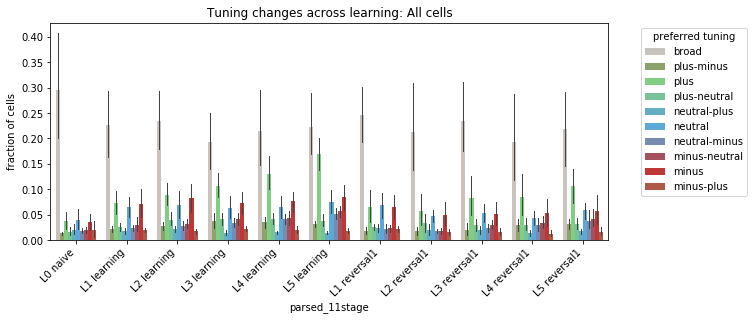

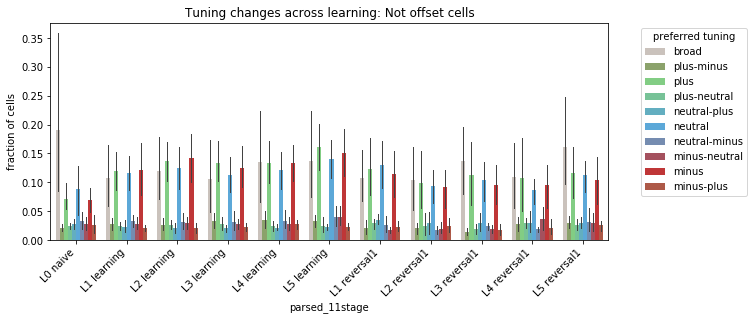

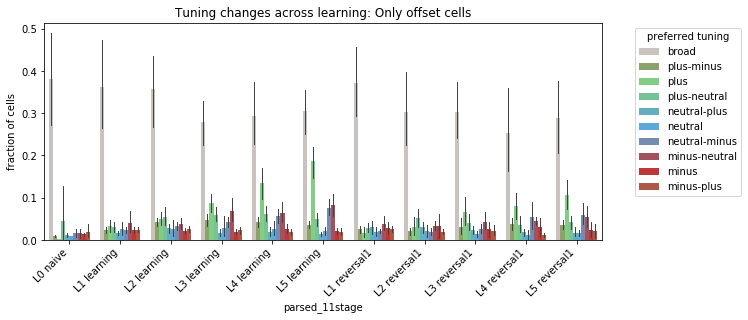

In [325]:
plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.barplot(data=cell_fractions.reset_index(), x='parsed_11stage', y='fraction of cells', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning',
              errwidth=1)
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('Tuning changes across learning: All cells')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/cell_tuning_all.png', bbox_inches='tight')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/cell_tuning_all.pdf', bbox_inches='tight')

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.barplot(data=not_offset_cell_fractions.reset_index(), x='parsed_11stage', y='fraction of cells', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning',
              errwidth=1)
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('Tuning changes across learning: Not offset cells')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/cell_tuning_nooffset.png', bbox_inches='tight')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/cell_tuning_nooffset.pdf', bbox_inches='tight')

plt.figure(figsize=(10,4))
hue_order = ['broad', 'plus-minus', 'plus', 'plus-neutral', 'neutral-plus', 'neutral', 'neutral-minus', 'minus-neutral', 'minus', 'minus-plus']
sns.barplot(data=offset_cell_fractions.reset_index(), x='parsed_11stage', y='fraction of cells', order=xorder,
              hue_order=hue_order,
              palette=cas.lookups.color_dict,
              hue='preferred tuning',
              errwidth=1)
plt.legend(title='preferred tuning', bbox_to_anchor=(1.05, 1.0))
plt.xticks(rotation=45, ha='right')
plt.title('Tuning changes across learning: Only offset cells')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/cell_tuning_offset.png', bbox_inches='tight')
plt.savefig('/twophoton_analysis/Data/analysis/Group-attractive/cell_tuning_offset.pdf', bbox_inches='tight')

# eliminate cells that are not firing in the broadly tuned category. 

In [386]:
cell_tuning

parsed_11stage preferred tuning  \
mouse cell_n                                   
AS20  1         L1 learning    minus-neutral   
      1        L1 reversal1            broad   
      1         L2 learning            broad   
      1        L2 reversal1            broad   
      1         L3 learning            broad   
      1        L3 reversal1            broad   
      1         L4 learning    minus-neutral   
      1        L4 reversal1            broad   
      1         L5 learning            broad   
      1        L5 reversal1    minus-neutral   
      2         L1 learning       minus-plus   
      2        L1 reversal1            broad   
      2         L2 learning            broad   
      2        L2 reversal1            broad   
      2         L3 learning     neutral-plus   
      2        L3 reversal1            broad   
      2         L4 learning       plus-minus   
      2        L4 reversal1            broad   
      2         L5 learning    minus-neutral   
      2        L5 reversal1            broad   
      3         L1 learning            broad   
      3        L1 reversal1            broad   
      3         L2 learning            broad   
      3        L2 reversal1            broad   
      3         L3 learning     plus-neutral   
      3        L3 reversal1            broad   
      3         L4 learning    neutral-minus   
      3        L4 reversal1    neutral-minus   
      3         L5 learning    neutral-minus   
      3        L5 reversal1    neutral-minus   
...                     ...              ...   
VF226 303       L2 learning             none   
      303      L2 reversal1             none   
      303       L3 learning             none   
      303      L3 reversal1             none   
      303       L4 learning             none   
      303      L4 reversal1            broad   
      303       L5 learning             none   
      303      L5 reversal1            broad   
      304          L0 naive             none   
      304       L1 learning             none   
      304      L1 reversal1             none   
      304       L2 learning             none   
      304      L2 reversal1             none   
      304       L3 learning             none   
      304      L3 reversal1            broad   
      304       L4 learning             none   
      304      L4 reversal1    minus-neutral   
      304       L5 learning             none   
      304      L5 reversal1             plus   
      305          L0 naive             none   
      305       L1 learning             none   
      305      L1 reversal1             none   
      305       L2 learning             none   
      305      L2 reversal1             none   
      305       L3 learning            broad   
      305      L3 reversal1             none   
      305       L4 learning             none   
      305      L4 reversal1             none   
      305       L5 learning    neutral-minus   
      305      L5 reversal1            broad   

                                                  cosine tuning  \
mouse cell_n                                                      
AS20  1       [0.27703752393513315, 0.40878113394493887, 0.6...   
      1       [0.4383533511466914, 0.5231192469343395, 0.323...   
      1       [0.4590143105844128, 0.46017341813116475, 0.35...   
      1       [0.3401368836046009, 0.5120632747216645, 0.428...   
      1       [0.24308305431762656, 0.5690768222639064, 0.50...   
      1       [0.4374724582960652, 0.47049024733178124, 0.36...   
      1       [0.23195557424411584, 0.49849228924837463, 0.6...   
      1       [0.4615837142278014, 0.46385150356646954, 0.34...   
      1       [0.2982930064240644, 0.5584841050273714, 0.440...   
      1       [0.22288391666448737, 0.46492932419407185, 0.6...   
      2       [0.2913081361063171, 0.6539172289196034, 0.385...   
      2       [0.46206199280591587, 0.3449835159639264, 0.46...   
      2       [0.3764134228195867, 0.3934539760955